In [11]:
#Importing relevent liabraries ,  along with the dataset from csv file
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
dataset = pd.read_csv("titanic-passengers.csv",sep = ';',header = 0 )

In [12]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [13]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

In [14]:
#splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state = 10)

In [15]:
#applying tree algorithm
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train,y_train)  #fitting our model
y_pred = model_tree.predict(x_test) # evaluating our model
print("Score:{}".format(accuracy_score(y_test,y_pred)))


Score:0.770949720670391


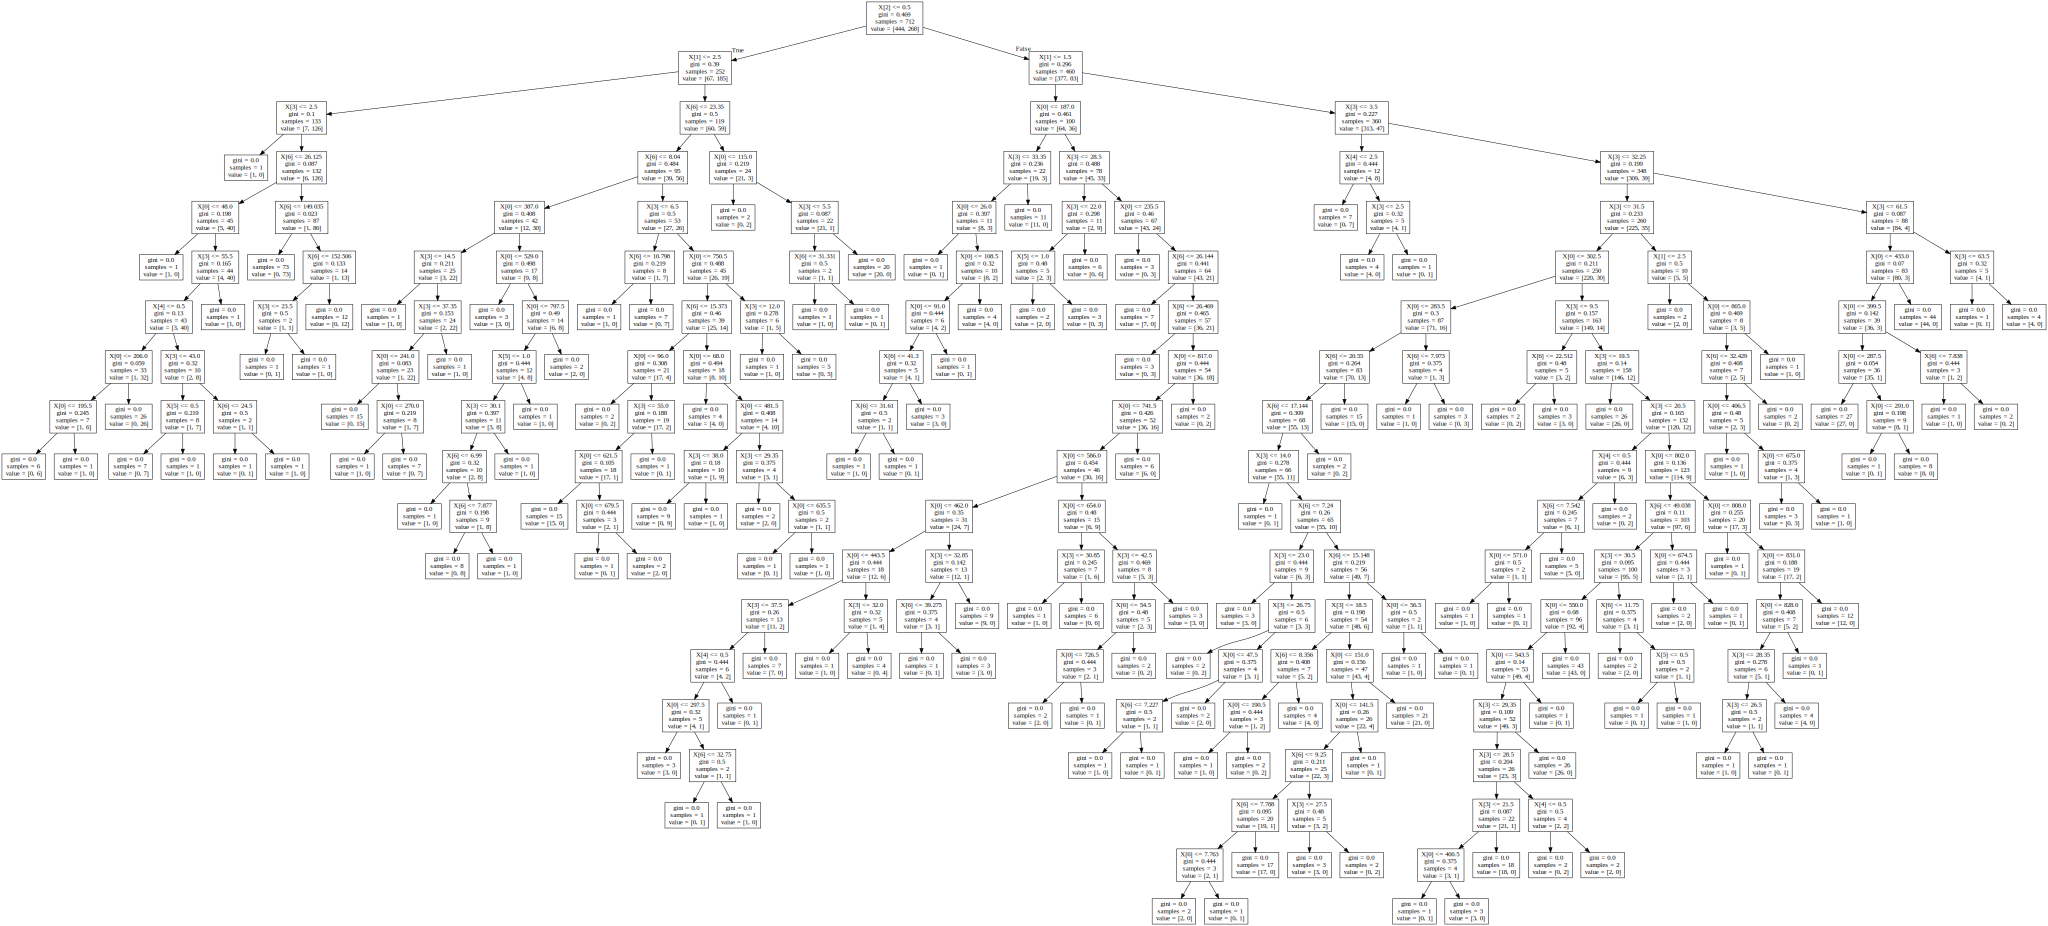

In [16]:
import graphviz
dot_data= tree.export_graphviz(model_tree,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [18]:
model_tree1 = tree.DecisionTreeClassifier( splitter="random",criterion="entropy")  
model_tree1.fit(x_train, y_train)
y_pred=model_tree1.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8156424581005587


In [ ]:
""" the accuracy score imporved after we changed the decision tree parameters from  Score:0.770949720670391 to score:0.8156424581005587"""

In [19]:
"Random Forest"
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
clf=RandomForestClassifier(n_estimators=99)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy with 99 estimators:", metrics.accuracy_score(y_test, y_pred))

Accuracy with 99 estimators: 0.8547486033519553


In [ ]:
""" the accuracy impoved further more by using the Random Forest model as it scores higher than both previous models """